In [13]:
#pip install networkx==2.6.3
!pip install fuzzymatcher

  Using cached fuzzymatcher-0.0.5-py3-none-any.whl (15 kB)
  Using cached python-Levenshtein-0.12.2.tar.gz (50 kB)
  Preparing metadata (setup.py) ... done
  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)
  Using cached Metaphone-0.6.tar.gz (14 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13918 sha256=7fa620a2b6abf7dcf08fcd6d44584e5ee4a2cb253cfd50fed5d68edea0d01de6
  Stored in directory: /Users/dannymathieson/Library/Caches/pip/wheels/ea/4e/3b/0634f08a7980461ad630fa4147cbd25913b008b4a02992ba66
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp38-cp38-macosx_10_9_x86_64.whl size=80955 sha256=9d384d6fb4b3a370e88e978e51e929053a8c49b8ad0696c0de5ffcf02bcb8785
  Stored in directory: /Users/dannymathieson/Library/Caches/pip/wheels/d7/0c/76/042b46eb0df65c3ccd0338f791210c55ab79d209bcc269e2c7
Successfully built metaphone python-Levenshtein


In [419]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import networkx as nx
import fuzzymatcher
from scipy.sparse.csgraph import connected_components

## EDA

In [420]:
df = pd.read_csv('/Users/dannymathieson/Desktop/Social Media Analytics/Final Project/SMA_NCAAM_Data.csv')
df.head()

,Year,Stars,Position,Name,Class,Previous School,New School
0,2021,4.0,SG,Dwayne Cohill,RS SO,Dayton,Youngstown State
1,2021,2.0,SG,Owen Long,SO,Maryville,Youngstown State
2,2021,2.0,SG,Chris Shelton,SO,Hampton,Youngstown State
3,2020,2.0,SG,Greyson Kelley,RS SR,Shaw,Youngstown State
4,2019,3.0,SG,Tyler Foster,JR,East Carolina,Youngstown State


In [421]:
df1819 = df.loc[(df['Year'] > 2017)].sort_values(by="Stars", ascending=False, ignore_index=True)
df1819 = df1819.loc[(df1819['Year'] < 2020)].sort_values(by="Stars", ascending=False, ignore_index=True)
df1819.head()

,Year,Stars,Position,Name,Class,Previous School,New School
0,2019,5.0,PG,Quade Green,RS JR,Kentucky,Washington
1,2018,5.0,SF,Brian 'Tugs' Bowen II,SR,Louisville,South Carolina
2,2019,5.0,PG,"Derryck Thornton, Jr.",RS N/A,USC,Boston College
3,2018,5.0,SG,Mustapha Heron,NaN,Auburn,St. John's
4,2018,4.7,C,Ikechukwu 'Ikey' Obiagu,RS JR,Florida State,Seton Hall


In [422]:
df20_stats = pd.read_csv('/Users/dannymathieson/Desktop/Social Media Analytics/Final Project/2020_stats.csv')
df20_stats

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG
0,Kansas,B12,30,28,116.1,87.7,0.9616
1,Baylor,B12,30,26,114.5,88.4,0.9513
2,Gonzaga,WCC,33,31,121.3,94.3,0.9472
3,Dayton,A10,31,29,119.5,93.4,0.9445
4,Michigan St.,B10,31,22,114.8,91.3,0.9326
...,...,...,...,...,...,...,...
348,Arkansas Pine Bluff,SWAC,29,4,80.1,104.3,0.0461
349,Maryland Eastern Shore,MEAC,31,5,82.1,108.0,0.0411
350,Mississippi Valley St.,SWAC,30,4,89.2,119.0,0.0350
351,Kennesaw St.,ASun,29,1,82.2,112.2,0.0269


In [423]:
# df = fuzzymatcher.fuzzy_left_join(df1819, df20_stats, 'Previous School', 'TEAM') # Probablistic matching of dataframes. Manually inspected for matches based on the sorted df
# df.drop( axis=1,labels=['__id_left', '__id_right'], inplace=True)

In [424]:
# df = fuzzymatcher.fuzzy_left_join(df, df20_stats, 'New School', 'TEAM') # Probablistic matching of dataframes. Manually inspected for matches based on the sorted df
# df.drop( axis=1,labels=['best_match_score','__id_left', '__id_right'], inplace=True)

In [425]:
df_d1 = pd.merge(df1819, df20_stats, left_on='Previous School', right_on='TEAM')
df_d1 = pd.merge(df_d1, df20_stats, left_on='New School', right_on='TEAM')
df_d1

,Year,Stars,Position,Name,Class,Previous School,New School,TEAM_x,CONF_x,G_x,W_x,ADJOE_x,ADJDE_x,BARTHAG_x,TEAM_y,CONF_y,G_y,W_y,ADJOE_y,ADJDE_y,BARTHAG_y
0,2019,5.0,PG,Quade Green,RS JR,Kentucky,Washington,Kentucky,SEC,31,25,112.8,95.2,0.8754,Washington,P12,32,15,105.5,93.3,0.8047
1,2019,4.0,PF,J'Raan Brooks,RS SO,USC,Washington,USC,P12,31,22,103.6,91.9,0.7990,Washington,P12,32,15,105.5,93.3,0.8047
2,2019,4.0,SG,Jemarl Baker,RS JR,Kentucky,Arizona,Kentucky,SEC,31,25,112.8,95.2,0.8754,Arizona,P12,32,21,110.9,91.2,0.9040
3,2019,4.7,PF,Jordan Brown,RS SO,Nevada,Arizona,Nevada,MWC,31,19,110.1,100.2,0.7476,Arizona,P12,32,21,110.9,91.2,0.9040
4,2018,2.7,SF,Ryan Luther,RS N/A,Pittsburgh,Arizona,Pittsburgh,ACC,33,16,103.2,98.8,0.6225,Arizona,P12,32,21,110.9,91.2,0.9040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,2019,2.0,PF,Eddie Davis III,RS SR,Hartford,The Citadel,Hartford,AE,31,18,94.2,100.7,0.3182,The Citadel,SC,27,6,95.3,110.7,0.1511
468,2019,2.0,PG,Jose Placer,RS SO,UMBC,North Florida,UMBC,AE,29,16,97.6,106.2,0.2735,North Florida,ASun,31,21,112.3,110.8,0.5372
469,2019,2.0,SG,Parker Edwards,RS SO,Southeastern Louisiana,LSU,Southeastern Louisiana,Slnd,28,8,93.1,108.2,0.1514,LSU,SEC,31,21,118.2,102.5,0.8373
470,2019,2.0,PG,"Donnell 'Red' Gresham, Jr.",RS N/A,Northeastern,Georgia,Northeastern,CAA,33,17,105.9,101.2,0.6272,Georgia,SEC,31,16,108.7,100.1,0.7211


In [426]:
df_all=df1819.dropna(axis=0) # Drops athletes who were not picked up by a new school
df_all

,Year,Stars,Position,Name,Class,Previous School,New School
0,2019,5.0,PG,Quade Green,RS JR,Kentucky,Washington
1,2018,5.0,SF,Brian 'Tugs' Bowen II,SR,Louisville,South Carolina
2,2019,5.0,PG,"Derryck Thornton, Jr.",RS N/A,USC,Boston College
4,2018,4.7,C,Ikechukwu 'Ikey' Obiagu,RS JR,Florida State,Seton Hall
5,2019,4.7,PF,Jordan Brown,RS SO,Nevada,Arizona
...,...,...,...,...,...,...,...
1862,2018,2.0,PF,Emeka Obukwelu,RS SR,UT Tyler,Arkansas
1864,2019,2.0,SG,Jalen Seegars,SR,UNC Asheville,Fayetteville State
1865,2019,2.0,C,Darian Dixon,SR,Northwestern State,Fayetteville State
1866,2018,2.0,PF,Jacob Brown,RS JR,Youngstown State,Fairmont State


In [385]:
# df.dropna(axis=0, inplace=True) # Drops athletes who were not picked up by a new school
# df

In [386]:
# df18 = df[df.Year>=2018].sort_values(by="Stars", ascending=False, ignore_index=True)
# df1819 = df18[df18.Year<=2019].sort_values(by="Stars", ascending=False, ignore_index=True)


## Network Analytics

In [427]:
def graph(data):
    G= nx.from_pandas_edgelist(data, 'Previous School', 'New School', edge_attr=['Stars'], 
                             create_using=nx.MultiDiGraph())
    nx.set_node_attributes(G, df20_stats.set_index('TEAM').to_dict('index'))
    #G.nodes(data=True)
    return G

In [428]:
#df20_stats.set_index('TEAM').to_dict('index')

In [429]:
mdg_d1= graph(df_d1)
mdg_all= graph(df_all)

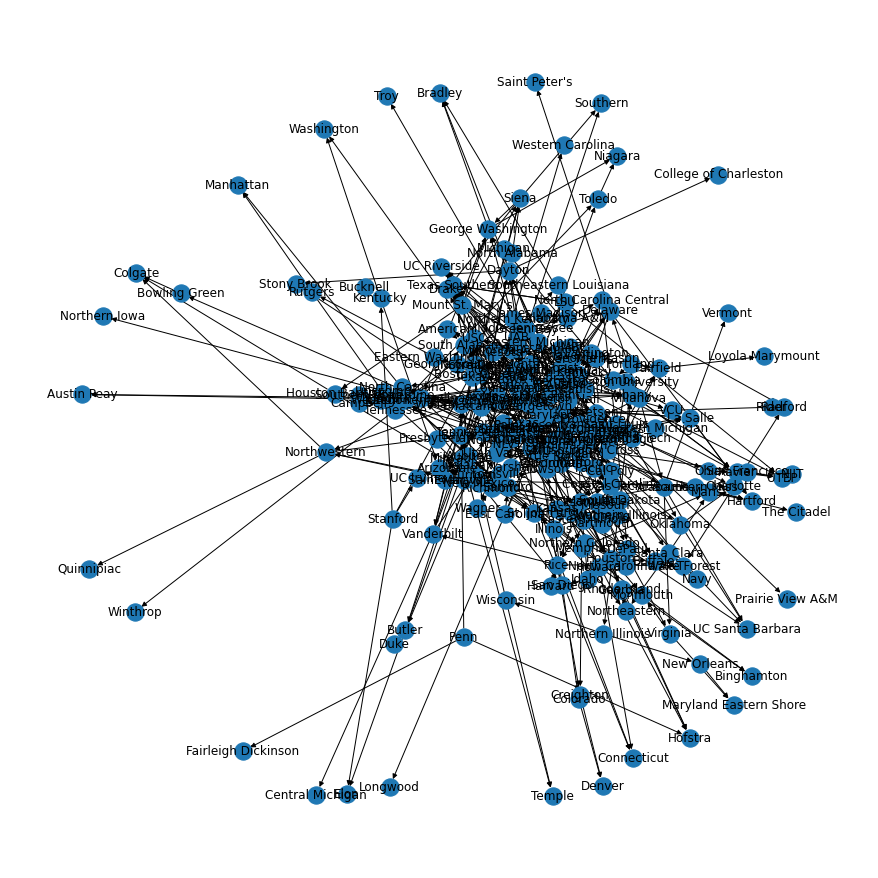

In [430]:
plt.figure(3,figsize=(12,12)) 
pos = nx.spring_layout(mdg_d1)
nx.draw(mdg, pos, with_labels=True)
plt.show()

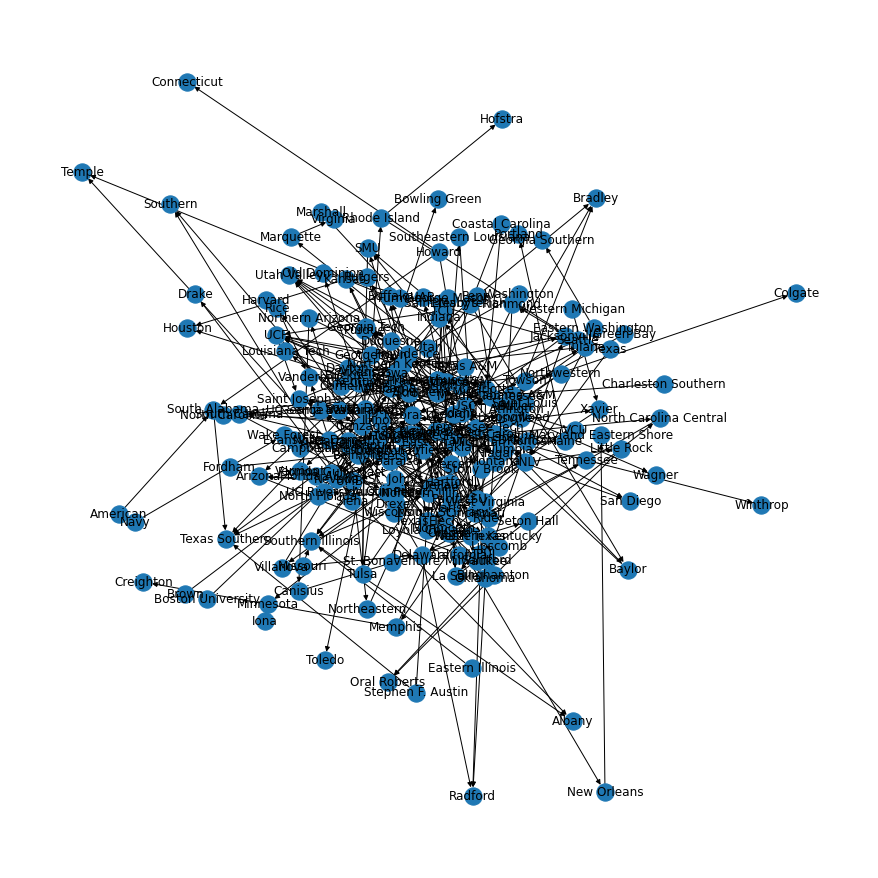

In [431]:
plt.figure(3,figsize=(12,12)) 
pos = nx.spring_layout(mdg_all)
nx.draw(mdg19, pos, with_labels=True)
plt.show()

In [432]:
nx.write_gexf(mdg_d1, "mdgd1_Gephi.gexf")
nx.write_gexf(mdg_all, "mdgall_Gephi.gexf")

In [448]:
#number of nodes and edges, diameter of graph, shortest path
print ("This graph has {} nodes".format(str(mdg_d1.number_of_nodes())))
print ("This graph has {} edges".format(str(mdg_d1.number_of_edges())))

This graph has 237 nodes
This graph has 472 edges


In [435]:
#number of nodes and edges, diameter of graph, shortest path
print ("This graph has {} nodes".format(str(mdg_all.number_of_nodes())))
print ("This graph has {} edges".format(str(mdg_all.number_of_edges())))

This graph has 766 nodes
This graph has 1585 edges


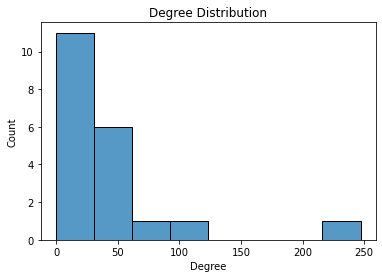

In [437]:
fig = sns.histplot(nx.degree_histogram(mdg_all));
fig.set_title("Degree Distribution")
fig.set_xlabel("Degree");

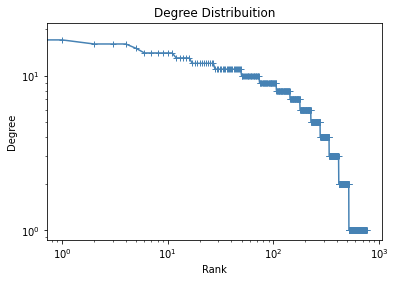

In [438]:
degree_dist=sorted(dict(nx.degree(mdg_all)).values(),reverse=True) 
plt.loglog(degree_dist, "steelblue", marker="+");
plt.title("Degree Distribuition")
plt.ylabel("Degree")
plt.xlabel("Rank");

The degree centrality of this graph is 0.0054096486288161905


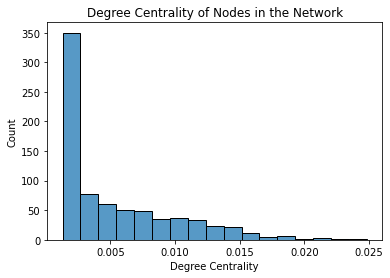

In [440]:
dc = np.mean(list(nx.degree_centrality(mdg_all).values()))
print ("The degree centrality of this graph is {}".format(str(dc)))
fig = sns.histplot(nx.degree_centrality(mdg_all))
fig.set_title("Degree Centrality of Nodes in the Network")
fig.set_xlabel("Degree Centrality");

In [441]:
dc_nodes = sorted(nx.degree_centrality(mdg_all), key=nx.degree_centrality(mdg_all).get, reverse=True)[:5]
print("The nodes with the highest degree centrality are " + str(dc_nodes))

The nodes with the highest degree centrality are ['UTEP', 'Chattanooga', 'GCU', 'Texas Southern', 'Utah Valley']


The closeness centrality of this graph is 0.05457475228070008


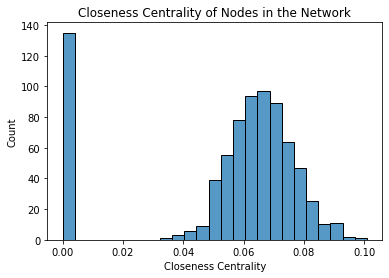

In [447]:
cc = np.mean(list(nx.closeness_centrality(mdg_all).values()))
print ("The closeness centrality of this graph is {}".format(str(cc)))
fig = sns.histplot(nx.closeness_centrality(mdg_all))
fig.set_title("Closeness Centrality of Nodes in the Network")
fig.set_xlabel("Closeness Centrality");

In [529]:
pg_rank=sorted([l for l in nx.pagerank(mdg_all, weight='Stars').items()],key=lambda x: x[1],reverse=True)
print("Top 10 Teams from All By Pagerank",pg_rank[:10])

Top 10 Teams from All By Pagerank [('Winthrop', 0.004977936008398343), ('American International', 0.004630024367452149), ('Pima Community College', 0.004447120058817753), ('UC San Diego', 0.004416461595376723), ('Nicholls State', 0.004414806606627544), ('Salt Lake Community College', 0.004402976494148783), ('Detroit Mercy', 0.004218834835304959), ('La Salle', 0.004073021587355138), ('Barry', 0.0036126559584844353), ('South Plains College', 0.0035960592703254907)]


In [530]:
pg_rank=sorted([l for l in nx.pagerank(mdg_d1, weight='Stars').items()],key=lambda x: x[1],reverse=True)
print("Top 10 Teams from All By Pagerank",pg_rank[:10])

Top 10 Teams from All By Pagerank [('Hartford', 0.019907671488114474), ('The Citadel', 0.018059071984331924), ("Mount St. Mary's", 0.017767603601787127), ('Delaware', 0.01702372038422218), ('South Carolina', 0.015600834337771784), ('La Salle', 0.014370974741920962), ('Santa Clara', 0.01420097763164325), ('Clemson', 0.013906402473267417), ('Wake Forest', 0.013813750477402782), ('Texas Southern', 0.013487616337641532)]


In [523]:
transfer_gross_d1 = sorted(mdg_d1.degree(weight='Stars'),key=lambda l:l[1], reverse=True)
print("D1 Gross Top Transfer Teams")
print(transfer_gross_d1[:10])

D1 Gross Top Transfer Teams
[('South Carolina', 34.2), ('Nevada', 30.6), ('Texas Tech', 29.4), ('Clemson', 28.2), ('Alabama', 27.9), ("St. John's", 27.3), ('Arkansas', 26.3), ('Chattanooga', 26.1), ('Nebraska', 26.0), ('La Salle', 26.0)]


In [524]:
transfer_gross_all = sorted(mdg_all.degree(weight='Stars'),key=lambda l:l[1], reverse=True)
print("All Gross Top Transfer Teams")
print(transfer_gross_all[:10])

All Gross Top Transfer Teams
[('UTEP', 44.2), ('Texas Tech', 40.8), ('GCU', 40.0), ('Nevada', 39.9), ('Chattanooga', 38.1), ('DePaul', 37.599999999999994), ('UNLV', 37.3), ('Texas Southern', 37.0), ('South Carolina', 36.2), ('Florida Gulf Coast', 35.7)]


In [525]:
transfer_gross_d1 = sorted(mdg_d1.degree(weight='Stars'),key=lambda l:l[1], reverse=True)
print("D1 Gross Bottom Transfer Teams")
print(transfer_gross_d1[-10:])

D1 Gross Bottom Transfer Teams
[('Eastern Washington', 2.0), ('Northern Iowa', 2.0), ("Saint Peter's", 2.0), ('Loyola Marymount', 2.0), ('Fairleigh Dickinson', 2.0), ('Prairie View A&M', 2.0), ('Green Bay', 2.0), ('James Madison', 2.0), ('Wofford', 2.0), ('The Citadel', 2.0)]


In [526]:
transfer_gross_all = sorted(mdg_all.degree(weight='Stars'),key=lambda l:l[1], reverse=True)
print("All Gross Bottom Transfer Teams")
print(transfer_gross_all[-10:])

All Gross Bottom Transfer Teams
[('Columbia State Community College', 2.0), ("Saint Martin's", 2.0), ('Diablo Valley College', 2.0), ('Dickinson College', 2.0), ('Dodge City Community College', 2.0), ('Doane University', 2.0), ('Des Moines Area Community College', 2.0), ('Enderun Colleges', 2.0), ('Everett Community College', 2.0), ('Fairmont State', 2.0)]


In [527]:
transfer_losses_d1 = sorted(mdg_d1.out_degree(weight='Stars'),key=lambda l:l[1], reverse=True)
print("D1 Bottom Transfer Teams")
print(transfer_losses_d1[:10])

D1 Bottom Transfer Teams
[('Alabama', 20.3), ('USC', 18.7), ("St. John's", 17.3), ('South Carolina', 17.2), ('Kansas', 16.7), ('Utah', 15.8), ('Texas A&M', 15.7), ('Stanford', 15.600000000000001), ('Duquesne', 15.5), ('Pittsburgh', 14.7)]


In [479]:
transfer_gains_d1 = sorted(mdg_d1.in_degree(weight='Stars'),key=lambda l:l[1], reverse=True)
print("D1 Top Transfer Teams")
print(transfer_gains_d1[:10])

D1 Top Transfer Teams
[('Texas Southern', 22.0), ('Arizona', 20.4), ('Texas Tech', 17.7), ('Clemson', 17.7), ('UCF', 17.3), ('South Carolina', 17.0), ('South Alabama', 17.0), ('La Salle', 17.0), ('UTEP', 16.5), ('Nevada', 16.2)]


In [480]:
transfer_losses_all = sorted(mdg_all.out_degree(weight='Stars'),key=lambda l:l[1], reverse=True)
print("All Bottom Transfer Teams")
print(transfer_losses19[:10])

All Bottom Transfer Teams
[('USC', 16.0), ('Utah', 15.8), ('Texas A&M', 15.7), ('Alabama', 14.0), ('TCU', 14.0), ('UNLV', 13.0), ('Kansas', 12.7), ('Nevada', 12.4), ('Valparaiso', 10.5), ('Florida', 10.3)]


In [481]:
transfer_gains_all = sorted(mdg_all.in_degree(weight='Stars'),key=lambda l:l[1], reverse=True)
print("All Top Transfer Teams")
print(transfer_gains_all[:10])

All Top Transfer Teams
[('Texas Southern', 27.0), ('New Mexico Junior College', 24.0), ('GCU', 23.0), ('South Plains College', 22.5), ('UTEP', 21.2), ('Arizona', 20.4), ('Northwest Florida State College', 20.0), ('Utah Valley', 20.0), ('Salt Lake Community College', 19.5), ('Tallahassee Community College', 19.3)]


In [258]:
# df_USC_Loss = df19[df19['Previous School'] =='USC']
# df_USC_Loss

In [482]:
def portal_net_score (loss, gain):
    loss_dict = dict(loss)
    gains_dict = dict(gain)
    net_gains_losses= {key: gains_dict[key] - loss_dict.get(key, 0) for key in gains_dict}
    net_gains_losses = {k: v for k, v in sorted(net_gains_losses.items(), key=lambda item: -item[1])}
    return list(net_gains_losses.items())

In [496]:
def portal_gross_score (loss, gain):
    loss_dict = dict(loss)
    gains_dict = dict(gain)
    net_gains_losses= {key: gains_dict[key] + loss_dict.get(key, 0) for key in gains_dict}
    net_gains_losses = {k: v for k, v in sorted(net_gains_losses.items(), key=lambda item: -item[1])}
    return list(net_gains_losses.items())

## These are the teams that we'll look into for Twitter. Need to get players Names

In [483]:
net_d1 = portal_net_score(transfer_losses_d1, transfer_gains_d1)
print("Net Winners D1")
net_d1[:5]

Net Winners D1


[('Texas Southern', 20.0),
 ('Arizona', 18.4),
 ('UTEP', 16.5),
 ('South Alabama', 12.5),
 ('Utah Valley', 12.0)]

In [484]:
print("Net Losers D1")
net_d1[-5:]

Net Losers D1


[('Duquesne', -13.5),
 ('USC', -14.7),
 ('Stanford', -15.600000000000001),
 ('Texas A&M', -15.7),
 ('Utah', -15.8)]

In [486]:
net_all = portal_net_score(transfer_losses_all, transfer_gains_all)
print("Net Winners All")
net_all[:5]

Net Winners All


[('New Mexico Junior College', 24.0),
 ('South Plains College', 22.5),
 ('Northwest Florida State College', 20.0),
 ('Salt Lake Community College', 19.5),
 ('Tallahassee Community College', 19.3)]

In [487]:
print("Net Losers All")
net_all[-5:]

Net Losers All


[('LSU', -19.0),
 ('Oregon State', -19.4),
 ('West Virginia', -19.8),
 ('East Carolina', -21.0),
 ('Utah', -27.5)]

In [531]:
gross_d1 = portal_gross_score(transfer_losses_d1, transfer_gains_d1)

In [532]:
net=pd.DataFrame(net_d1, columns = ['TEAM', 'Net'])
gross=pd.DataFrame(gross_d1, columns = ['TEAM', 'Gross'])


In [539]:
pg_rank_d1=sorted([l for l in nx.pagerank(mdg_d1, weight='Stars').items()],key=lambda x: x[1],reverse=True)
prdf=pd.DataFrame(pg_rank_d1, columns = ['TEAM', 'PageRank'])
prdf

,TEAM,PageRank
0,Hartford,0.019908
1,The Citadel,0.018059
2,Mount St. Mary's,0.017768
3,Delaware,0.017024
4,South Carolina,0.015601
...,...,...
232,Navy,0.001131
233,Eastern Washington,0.001131
234,Green Bay,0.001131
235,James Madison,0.001131


## Net degree is better than PageRank becuase PR penalizes low volume traders, where net penalizes the starpower lost

In [540]:
trend_df = pd.merge(net, df20_stats, on='TEAM')

In [541]:
trend_df = pd.merge(trend_df, gross, on='TEAM')

In [542]:
trend_df = pd.merge(trend_df, prdf, on='TEAM')

In [543]:
trend_df

,TEAM,Net,CONF,G,W,ADJOE,ADJDE,BARTHAG,Gross,PageRank
0,Texas Southern,20.0,SWAC,31,16,98.4,109.8,0.2216,24.0,0.013488
1,Arizona,18.4,P12,32,21,110.9,91.2,0.9040,22.4,0.008619
2,UTEP,16.5,CUSA,29,17,96.7,98.6,0.4439,16.5,0.009431
3,South Alabama,12.5,SB,28,20,104.3,103.6,0.5185,21.5,0.008756
4,Utah Valley,12.0,WAC,27,11,96.1,104.2,0.2843,16.0,0.007984
...,...,...,...,...,...,...,...,...,...,...
232,Duquesne,-13.5,A10,30,21,107.0,98.9,0.7118,17.5,0.007919
233,USC,-14.7,P12,31,22,103.6,91.9,0.7990,22.7,0.004091
234,Stanford,-15.6,P12,32,20,104.2,90.7,0.8315,15.6,0.001131
235,Texas A&M,-15.7,SEC,30,16,101.2,97.4,0.6083,15.7,0.001131


/Users/dannymathieson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gross', ylabel='BARTHAG'>

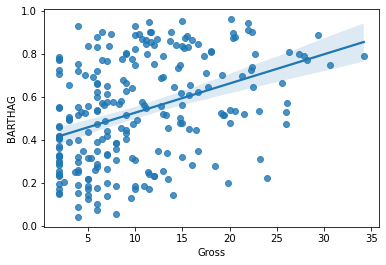

In [544]:
sns.regplot(trend_df.Gross, trend_df.BARTHAG) 

/Users/dannymathieson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Net', ylabel='BARTHAG'>

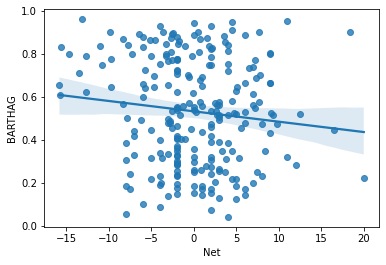

In [545]:
sns.regplot(trend_df.Net, trend_df.BARTHAG) 

/Users/dannymathieson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PageRank', ylabel='BARTHAG'>

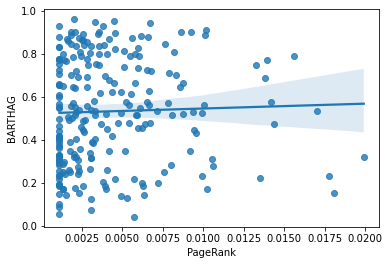

In [546]:
sns.regplot(trend_df.PageRank, trend_df.BARTHAG) 

# Twitter Stuff

## Getting Names

In [548]:
net_d1[:5]

[('Texas Southern', 20.0),
 ('Arizona', 18.4),
 ('UTEP', 16.5),
 ('South Alabama', 12.5),
 ('Utah Valley', 12.0)]

In [549]:
net_d1[-5:]

[('Duquesne', -13.5),
 ('USC', -14.7),
 ('Stanford', -15.600000000000001),
 ('Texas A&M', -15.7),
 ('Utah', -15.8)]

In [558]:
def get_players (inORout,Team):
    x = df_d1.loc[df_d1[inORout] == Team]
    return list(x.Name)

## Players for Top 5 Schools

In [559]:
get_players("New School", "Texas Southern")

['John Jones',
 'Jalyn Patterson',
 'Jeremy Combs',
 'John Walker III',
 'Shawn Olden',
 'Chris Baldwin',
 'Joirdon Karl Nicholas',
 'Jordan Gilliam',
 'Eden Ewing',
 'Jordan Andrews']

In [560]:
get_players("New School", "Arizona")

['Jemarl Baker',
 'Jordan Brown',
 'Ryan Luther',
 'Justin Coleman',
 'Max Hazzard',
 'Stone Gettings']

In [561]:
get_players("New School", "UTEP")

['Daryl Edwards',
 'Kaden Archie',
 'Keonte Kennedy',
 'Tydus Verhoeven',
 'Souley Boum',
 'Anthony Tarke']

In [562]:
get_players("New School", "South Alabama")

['Don Coleman',
 'DeAundre Ballard',
 'Josh Ayeni',
 'Kory Holden',
 'Andre Fox',
 'Chad Lott',
 'Sam Iorio']

In [563]:
get_players("New School", "Utah Valley")

['Brandon Morley',
 'Emmanuel Olojakpoke',
 'Trey Woodbury',
 'Connor MacDougall',
 'Cavit Ege Havsa',
 'Fardaws Aimaq']

## Players for Bottom 5 Schools

In [564]:
get_players("Previous School", "Utah")

['Donnie Tillman',
 'Vante Hendrix',
 'Jayce Johnson',
 'Naseem Gaskin',
 'Brandon Morley']

In [565]:
get_players("Previous School", "Texas A&M")

['John Walker III',
 'Admon Gilder',
 'J.J. Caldwell',
 'Isiah Jasey',
 'Brandon Mahan']

In [566]:
get_players("Previous School", "Stanford")

['Reid Travis', 'Cormac Ryan', 'Robert Cartwright', 'Marcus Sheffield II']

In [567]:
get_players("Previous School", "USC")

["J'Raan Brooks",
 'Derryck Thornton, Jr.',
 "Chinedu 'Victor' Uyaelunmo",
 'Jordan Usher',
 'Harrison Henderson']

In [568]:
get_players("Previous School", "Duquesne")

['Tarin Smith',
 'Tydus Verhoeven',
 'Michael Lewis II',
 'Gavin Bizeau',
 'Dylan Swingle',
 'Eric Williams, Jr.']

In [569]:
import tweepy
import pandas as pd

import nltk
from nltk import tokenize, sentiment, corpus, stem
from gensim import corpora, models

from collections import Counter

In [584]:
def try_tweets(filename, team, players):
    try:
        df = pd.read_csv(filename)
        print('Import Successful!')
    except FileNotFoundError:

        bearer = "AAAAAAAAAAAAAAAAAAAAAHJOaAEAAAAAtpbHTZ936h9COqGzIjaHhORUukA%3DMYnWqM9CUgxSU1nLyLe2ARWrRUElckwVYF7fywvBrL2ui0Xj9j"
        client = tweepy.Client(bearer_token=bearer, wait_on_rate_limit=True)


        def get_tweets(client, query, n=5000):
            page_size = 100
            pages = n // 100 + 1
            for tweet_batch in tweepy.Paginator(client.search_recent_tweets, query,
                                          tweet_fields=["created_at", "public_metrics", "entities"],
                                           expansions=["author_id"],
                                          user_fields=["username", "public_metrics"],
                                          max_results=page_size, limit=pages):
                user_lookup = {u.id: u.data for u in tweet_batch.includes["users"]}
                for tweet in tweet_batch.data:
                    data = tweet.data
                    data["author"] = user_lookup[tweet.author_id]
                    yield tweet.data
        query = " ".join(team+players)
        tweets = list(get_tweets(client, query))
        dataset = []
        for tweet in get_tweets(client, query):
            datum = {
                "id": tweet["id"],
                "username": tweet["author"]["username"],
                "user_followers_count": tweet["author"]["public_metrics"]["followers_count"],
                "user_following_count": tweet["author"]["public_metrics"]["following_count"],
                "text": tweet["text"],
                "created_at": tweet["created_at"],
                "retweet_count": tweet["public_metrics"]["retweet_count"],
            }


            if "entities" in tweet and "mentions" in tweet["entities"]:
                mentions = tweet["entities"]["mentions"]
            else:
                mentions = []

            datum['mentioned_user_ids'] = ','.join(mention['id'] for mention in mentions)
            datum['mentioned_user_names'] = ','.join(mention['username'] for mention in mentions)


            if "entities" in tweet and "hashtags" in tweet["entities"]:
                mentions = tweet["entities"]["hashtags"]
            else:
                mentions = []
            datum['hashtags'] = ','.join(mention['tag'] for mention in mentions)

            if "entities" in tweet and "urls" in tweet["entities"]:
                mentions = tweet["entities"]["urls"]
            else:
                mentions = []
            datum['urls'] = ','.join(mention["expanded_url"] for mention in mentions)

            dataset += [datum]
        df = pd.DataFrame.from_dict(dataset)
        df.to_csv(filename)

In [585]:
try_tweets('TSU_TEST.csv', ['Texas Southern'], get_players("New School", "Texas Southern"))

KeyError: 'users'